# Incremental (Online) Learning with Scikit-Multiflow

With seemingly infinite streams of data, one of the key challenges is to create lightweight models that are always ready to predict and adaptive to changes in the data distribution.

## What is Incremental Learning?

At every iteration, the model predicts a class label, reveals the true label, and is then updated



Incremental learning refers to a family of scalable algorithms that learn to sequentially update models from infinite data streams. 

An incremental model has the following characteristics:
    
    
   **It can predict at any time**


   **It can adapt to concept drif**t — i.e. changes in the data distribution

   **It is able to process an infinite data stream with finite resources (time and memory)**

**Scikit-Multiflow** - a free Python framework for data-stream learning.

In [44]:
 #pip install -U Cython

In [45]:
#pip install -U scikit-multiflow

In [2]:
%matplotlib notebook

#### There are several methods to use stream data:
1. By Stream Generators
2. By creating stream from a file source
3. By creating stream from a data source (Devices)

In [143]:
from skmultiflow.data import SEAGenerator  

The SEA generator allows you to generate an infinite data stream with 3 inputs and 2 outputs. This particular data stream contains frequent, abrupt concept drift.

In [144]:
stream = SEAGenerator()      # create a stream
stream.prepare_for_use()     # prepare the stream for use

C:\Users\JaFsi\anaconda3\lib\site-packages\skmultiflow\data\base_stream.py:194: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  category=FutureWarning)


In [145]:
#stream.generate_drift()

Then, if we wish to obtain a data sample, all we need to do is

In [146]:
"""for _ in range(10):
    X,Y = stream.next_sample()
    print(X)
    print(Y)"""

'for _ in range(10):\n    X,Y = stream.next_sample()\n    print(X)\n    print(Y)'

In [147]:
#X

In [148]:
#Y

## Simple Online Classifier

There are many incremental models available with scikit-multiflow, one of the most popular being Hoeffding Trees.

## Hoeffding Trees

Hoeffding trees are built using the Very Fast Decision Tree Learner (VFDT), an anytime system that builds decision trees using constant memory and constant time per example. Introduced in 2000 by Pedro Domingos and Geoff Hulten, it makes use of a well known statistical result, the Hoeffding bound, in order to guarantee that its output is asymptotically identical to that of a traditional learner.

In [149]:
from skmultiflow.trees import HoeffdingTreeClassifier
tree = HoeffdingTreeClassifier()

#### Training a Hoeffding Tree for Classification




If we want to train the tree on the SEA data stream, we can just loop through however many data points we want.

In [150]:
correctness_dist = []
nb_iters = 2000
for i in range(nb_iters):
   X, Y = stream.next_sample()        # get the next sample
   prediction = tree.predict(X)       # predict Y using the tree     
   if Y == prediction:                # check the prediction
     correctness_dist.append(1)
   else:
     correctness_dist.append(0)   
   
   tree.partial_fit(X, Y)             # update the tree

In [151]:
#correctness_dist

<IPython.core.display.Javascript object>


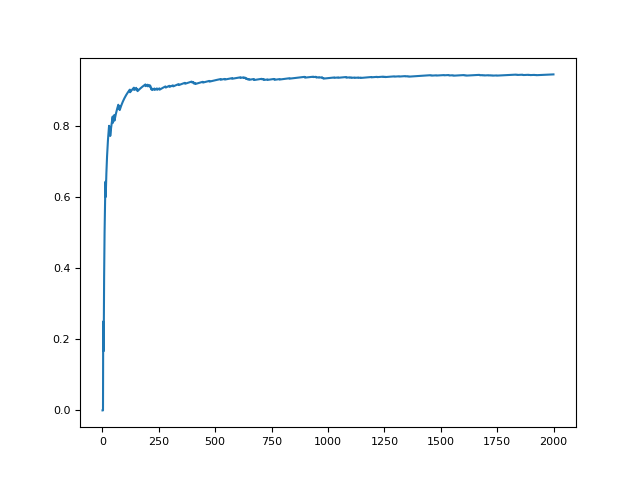

In [152]:
import matplotlib.pyplot as plt

time = [i for i in range(1, nb_iters)]
accuracy = [sum(correctness_dist[:i])/len(correctness_dist[:i]) for i in range(1, nb_iters)]
plt.plot(time, accuracy)

## Alternative Approach with Scikit-Multiflow

In scikit-multiflow, there is a built-in way to do the exact same thing with less code. What we can do is import the EvaluatePrequential class:

In [153]:
from skmultiflow.evaluation import EvaluatePrequential

In [154]:
eval=EvaluatePrequential(show_plot=True,max_samples=10000,metrics=['accuracy','kappa','running_time','model_size'])

<IPython.core.display.Javascript object>


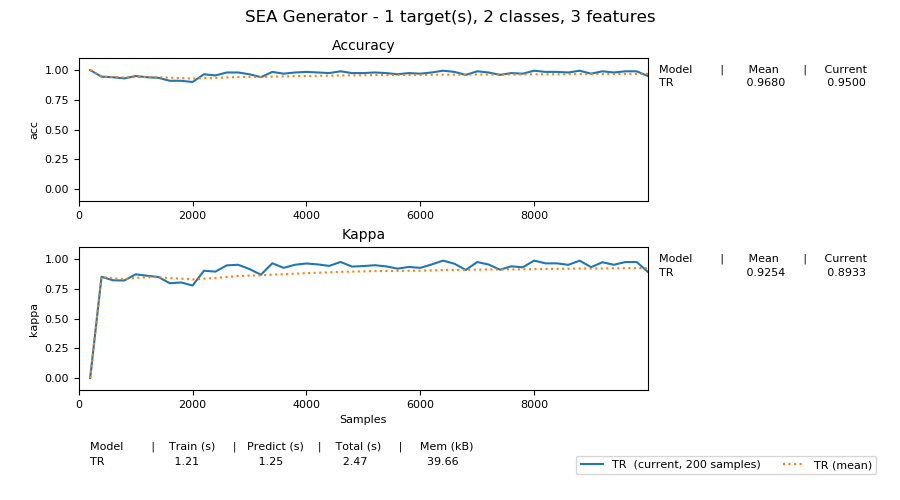

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 200 sample(s).
Evaluating...
 #################### [100%] [4.27s]
Processed samples: 10000
Mean performance:
TR - Accuracy     : 0.9680
TR - Kappa        : 0.9254
TR - Training time (s)  : 1.21
TR - Testing time  (s)  : 1.25
TR - Total time    (s)  : 2.47
TR - Size (kB)          : 39.6641


In [155]:
eval.evaluate(stream=stream, model=tree, model_names=['TR']);

### Demonstrates how to evaluate one model and visualize the predictions using data points.

<IPython.core.display.Javascript object>


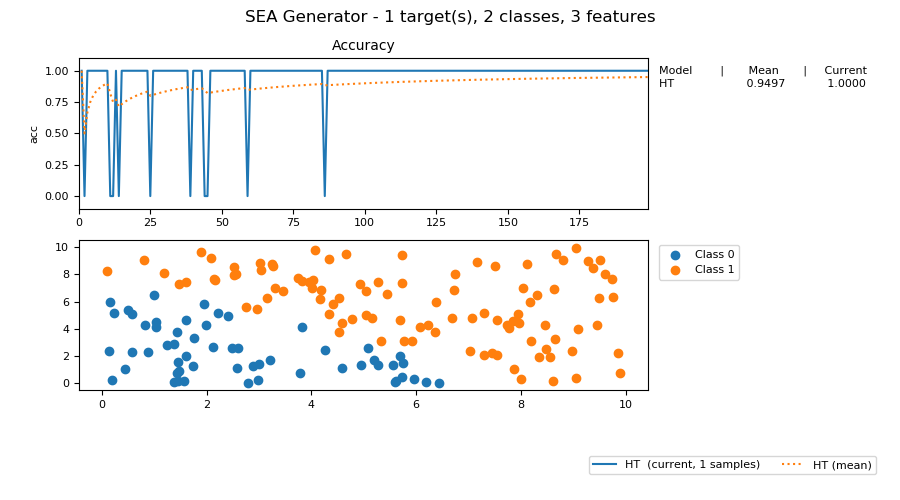

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #################### [100%] [11.12s]
Processed samples: 200
Mean performance:
HT - Accuracy     : 0.9497


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05)]

In [3]:
# The third example demonstrates how to evaluate one model
# and visualize the predictions using data points.
# Note: You can not in this case compare multiple models
from skmultiflow.data import SEAGenerator
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential
# Set the stream
stream = SEAGenerator(random_state=1)
#stream.generate_drift()
# Set the model
ht = HoeffdingTreeClassifier()
# Set the evaluator
evaluator = EvaluatePrequential(max_samples=200,
                                n_wait=1,
                                pretrain_size=1,
                                max_time=1000,
                                show_plot=True,
                                metrics=['accuracy'],
                                data_points_for_classification=True)

# Run evaluation
evaluator.evaluate(stream=stream, model=ht, model_names=['HT'])